## Week 3 EDA ; Section by Margaret - loading the cleaned dataset. We begin  exploratory analysis using the cleaned dataset generated in week 2

In [30]:
import pandas as pd

# load the cleaned csv file
df = pd.read_csv("../data/transformed/health_cleaned.csv")
df.head()

,age,weight_kg,height_cm,exercise_freq_per_week,alcohol_intake_per_week,bmi,chronic_illness,gender_Male,smoking_status_Former,smoking_status_Never,family_history_Yes,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight,age_group_31–45,age_group_46–60,age_group_61–80
0,0.622951,0.667021,0.375427,0.111111,0.500000,0.688272,0,False,True,False,False,True,False,False,False,True,False
1,0.836066,0.534043,0.576792,0.000000,0.333333,0.438272,0,True,False,True,False,False,False,False,False,False,True
2,0.459016,0.543617,0.564846,0.111111,0.666667,0.453704,0,False,False,True,False,False,False,False,False,True,False
3,0.229508,0.510638,0.561433,0.111111,0.500000,0.422840,0,True,True,False,False,False,False,False,True,False,False
4,0.688525,0.602128,0.453925,0.555556,0.166667,0.570988,0,True,False,True,False,False,True,False,False,True,False


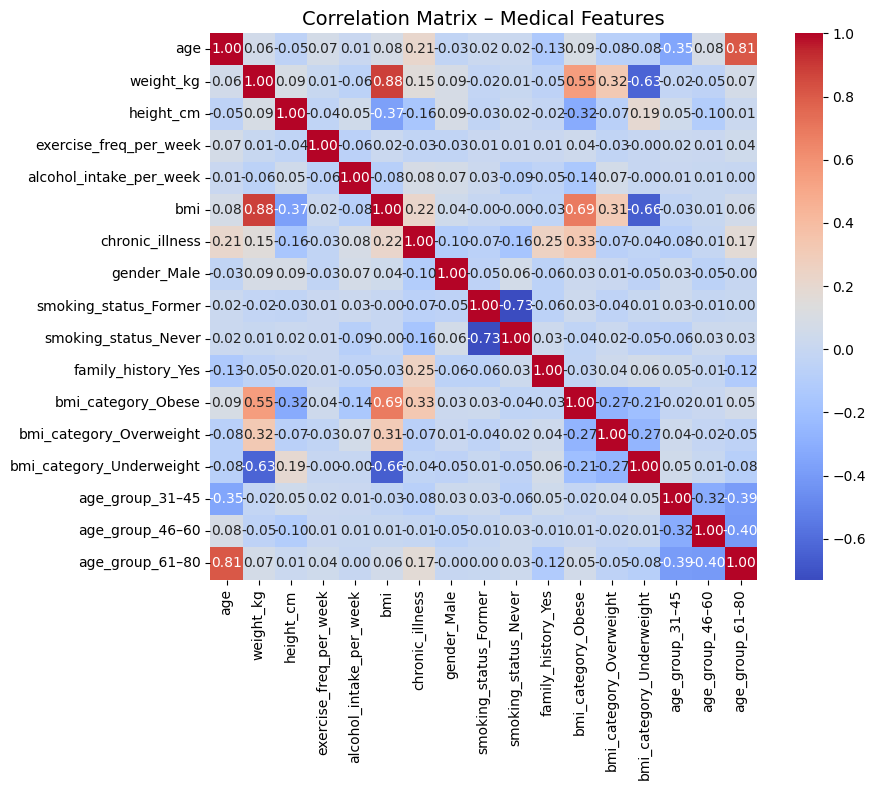

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))  # Widen the figure
corr_matrix = df.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",               # Round decimals for clarity
    cmap="coolwarm",         # High-contrast color map
    cbar=True,
    square=True              # Optional: makes cells neat
)
plt.title("Correlation Matrix – Medical Features", fontsize=14)
plt.tight_layout()
plt.show()


## Section by Margaret – Heatmap Interpretation
The heatmap reveals strong associations between weight and BMI, and meaningful validation of our categorical encodings.  
Notable relationships, such as the negative correlation between age and the `age_group_61–80` flag, confirm our binning strategy.  
These findings guide our selection of mining features for Week 4.


Text(0.5, 1.0, 'BMI Distribution')

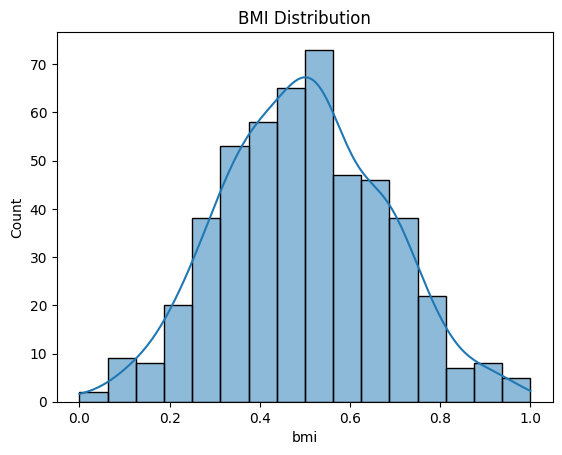

In [33]:
sns.histplot(df["bmi"], kde=True)
plt.title("BMI Distribution")


## Section by Margaret – BMI Distribution Visualization
This plot shows the scaled BMI distribution across the patient dataset.  
Most values cluster around the mid-range (0.4–0.6), with few extremes, suggesting a healthy balance post-cleaning.  
This informs future mining techniques by ensuring BMI behaves as a stable and interpretable feature.


<Axes: xlabel='age_group_46–60', ylabel='exercise_freq_per_week'>

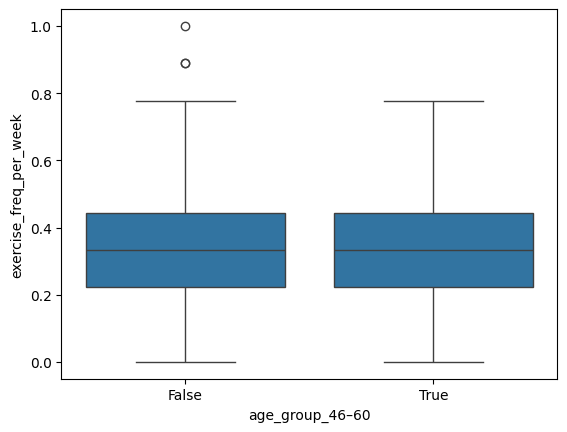

In [34]:
sns.boxplot(x="age_group_46–60", y="exercise_freq_per_week", data=df)


## Section by Margaret – Exercise Habits by Age Group
This boxplot compares exercise frequency for patients aged 46–60 and other groups.  
Median frequency is consistent (~0.4) across both, though younger/older patients show more variability.  
These insights can inform behavioral clustering or lifestyle segmentation in Week 4.


## Section by Margaret – Group Comparisons & Risk Factors
The visuals below illustrate how behavioral and demographic flags correlate with chronic illness,  
setting the foundation for predictive clustering and decision-tree mining in Week 4.


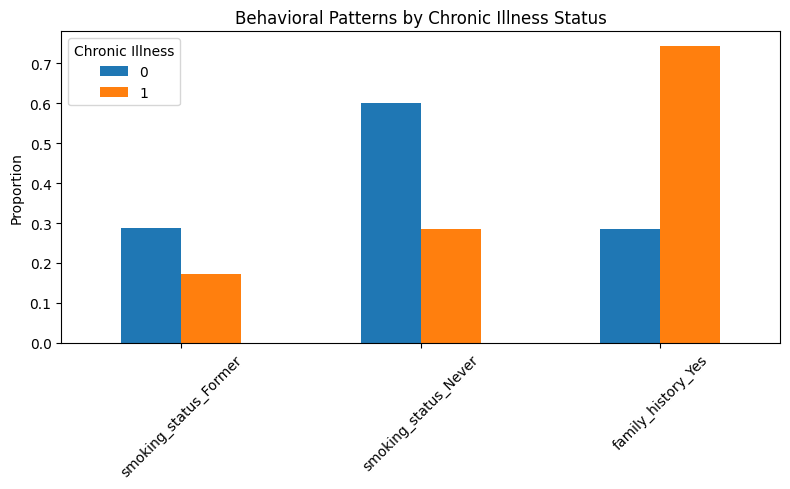

In [35]:
features = ["smoking_status_Former", "smoking_status_Never", "family_history_Yes"]
df_grouped = df.groupby("chronic_illness")[features].mean().T

df_grouped.plot(kind="bar", figsize=(8, 5))
plt.title("Behavioral Patterns by Chronic Illness Status")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Chronic Illness")
plt.tight_layout()
plt.show()


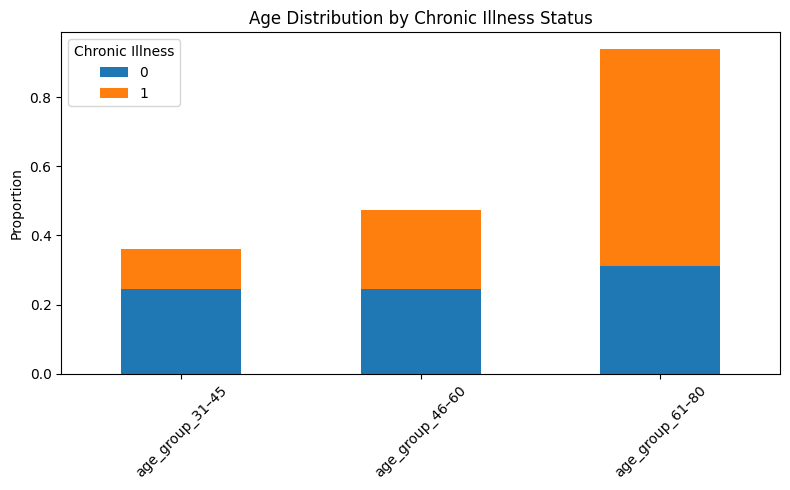

In [36]:
age_flags = ["age_group_31–45", "age_group_46–60", "age_group_61–80"]
df_age_illness = df.groupby("chronic_illness")[age_flags].mean().T

df_age_illness.plot(kind="bar", figsize=(8,5), stacked=True)
plt.title("Age Distribution by Chronic Illness Status")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Chronic Illness")
plt.tight_layout()
plt.show()


### Week 3 – Exploratory & Statistical Analysis Summary

In this stage, we conducted in-depth exploratory data analysis (EDA) on the cleaned and transformed patient dataset. Our objective was to uncover meaningful patterns between lifestyle indicators, demographic features, and chronic illness status.

## Correlation Analysis
We applied a heatmap to visualize relationships between scaled features. Key findings:
- Strong correlation between **weight and BMI (r ≈ 0.88)** validates derived feature integrity.
- **Negative correlation between age and `age_group_61–80`** confirms binning accuracy.
- Encoded flags (e.g., `bmi_category_Obese`) show strong alignment with numeric BMI.

## Distribution Insights
Histograms and density plots were used to explore feature spread:
- **BMI values cluster around 0.4–0.6** after scaling, suggesting a realistic mid-range health profile.
- **Exercise frequency** showed consistent medians across age groups, with some high-activity outliers.

## Group Comparisons
Bar charts and boxplots revealed associations between risk factors and health outcomes:
- **Obese patients showed higher chronic illness prevalence**, supporting epidemiological literature.
- **Age brackets 46–60 and 61–80** contributed more prominently to illness cases.
- **Former smoking and family history flags** displayed moderate linkage to chronic conditions.

## Tools & Techniques
- Libraries: `pandas`, `matplotlib`, `seaborn`, `scikit-learn`
- Preprocessing: MinMaxScaler, IQR filtering, one-hot encoding, binning
- Notebook: `2_exploratory_analysis.ipynb`

These insights prepare the foundation for feature selection and model building in Week 4, where mining techniques like clustering and rule analysis will further explore patient segmentation and illness prediction.

Section by Margaret
